<a href="https://colab.research.google.com/github/theclassofai/Deep_Learning_Python/blob/master/Lesson1_Intro_to_NN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
%cd /gdrive/My Drive/Images
!pwd
import warnings
warnings.filterwarnings('ignore')

/gdrive/My Drive/Images
/gdrive/My Drive/Images


In [0]:
from IPython.display import Image

# Introduction to Neural Networks and Keras
## Anatomy of a neural network

Training a neural network are meant to roam the following objects:

* The input data and corresponding targets
* Layers, which are combined into a network (or model)
* The loss function, which defines the feedback signal used for learning
* The optimizer, which determines how learning proceeds and find optimal minima



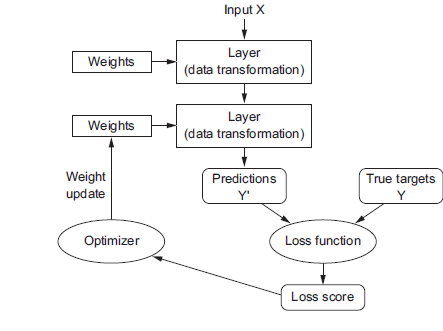

In [0]:
Image('Fig_1.png', width=534, height=417)

The fundamental data structure in neural networks is the `layer`. A `layer` is a data-processing module that takes as `input` one or more tensors and that outputs one or more tensors. 

Different layers are appropriate for different tensor formats and different types of data processing.
For instance,

* Simple vector data, stored in `2D tensors` of shape (`samples`, `features`), is often processed by densely connected layers, also called fully connected or `dense` layers (the Dense class in Keras). 

* Sequence data, stored in `3D tensors` of shape `(samples, timesteps, features)`, is typically processed by recurrent layers such as an LSTM layer.

* Image data, stored in `4D tensors`, is usually processed by 2D convolution layers (Conv2D).


### Layers: the building blocks of deep learning

In [0]:
from keras import layers
layer = layers.Dense(32, input_shape=(784,)) # A dense layer with 32 output unit

We’re creating a layer that will only accept as input 2D tensors where the first dimension is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be accepted). This layer will return a tensor where the first dimension has been transformed to be 32.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))
model.summary()

The second layer didn’t receive an input shape argument—instead, it automatically inferred its input shape as being the output shape of the layer that came before.

### Models: networks of layers

The topology of a network defines a hypothesis space. Machine learning is defined as “searching for useful representations of some input data, within a predefined space of possibilities, using guidance from a feedback signal.” By choosing a network topology, you constrain your space of possibilities (hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you’ll then be searching for is a good set of values for the weight tensors involved in these tensor operations. 

####"Picking the right network architecture is more an art than a science"

### Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, you still have to choose two more things:

* Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.

* Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

## Introduction to Keras

Keras is a deep-learning framework for Python that provides a convenient way to define and train almost any kind of deep-learning model. 

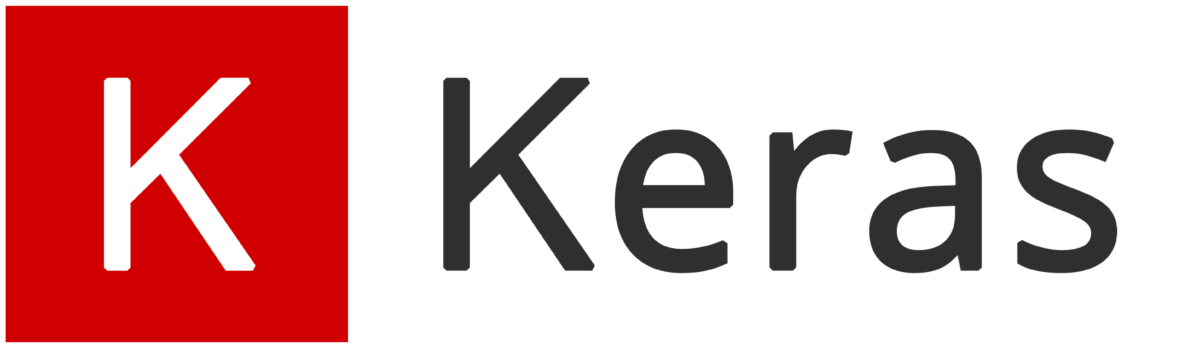

In [0]:
Image('keras.png', width=300, height=100)

Keras was initially developed for researchers, with the aim of enabling fast experimentation. Keras has the following key features:

* It allows the same code to run seamlessly on CPU or GPU.
*  It has a user-friendly API that makes it easy to quickly prototype deep-learning
models.
*  It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both. 
*  It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means Keras is appropriate for building essentially any deep-learning model, from a generative adversarial network to a neural Turing machine.
* François Chollet - Primary Author and maintainer, Google Engineer
* Documentation – https://keras.io/

### Four guiding principles of Keras –

* **User friendliness** –
1. Keras is an API designed for human beings
2.  Keras follows best practices for reducing cognitive load
3.  Offers consistent & simple APIs

* **Modularity** –
1. A model is understood as a sequence or a graph of standalone
2. Fully-configurable modules that can be plugged together with as little restrictions as possible.

* **Easy extensibility** –
1. New modules are simple to add (as new classes and functions)
2. Existing modules provide ample examples

* **Work with Python** –
1. No separate models configuration files in a declarative format. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.

Keras is a model-level library, providing high-level building blocks for developing deep-learning models.

* Not support low-level operations such as tensor manipulation and differentiation. 

* It relies on a specialized, well-optimized tensor library to do so, serving as the backend engine of Keras. Rather than choosing a single tensor library and tying the implementation of Keras to that library, Keras handles the problem in a modular way (see figure below); thus several different backend engines can be plugged seamlessly into Keras. 

* Currently, the three existing backend implementations are the TensorFlow backend, the Theano backend, and the Microsoft Cognitive Toolkit (CNTK) backend. 

* In the future, it’s likely that Keras will be extended to work with even more deep-learning execution engines.

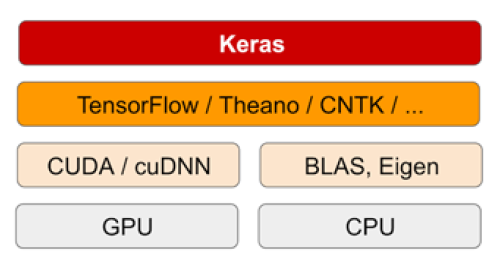

In [0]:
Image('tf.png', width=400, height=270)

TensorFlow, CNTK, and Theano are some of the primary platforms for deep learning today. 

* Theano (http://deeplearning.net/software/theano) is developed by the MILA lab at Université de Montréal.

* TensorFlow (www.tensorflow.org) is developed by Google

* CNTK (https://github.com/Microsoft/CNTK) is developed by Microsoft.

### Developing with Keras

The typical Keras workflow looks just like:

1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
4. Iterate on your training data by calling the fit() method of your model.

In [0]:
# Define function to import
from keras import models
from keras import layers
from keras import optimizers

# Create model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

# Compile model
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss='mse',
              metrics=['accuracy'])


Using TensorFlow backend.
W0725 11:19:56.971337 140307379861376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 11:19:57.013890 140307379861376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 11:19:57.021601 140307379861376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 11:19:57.071244 140307379861376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [0]:

# Finally, fit the model
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)